<a href="https://colab.research.google.com/github/AlaAddinAlmaqtari/ModelBuilding/blob/main/Copy_of_Model_building_Project_Alaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## تجهيز الداتا قبل التدريب

**Data dictionary**
The data set is about the survived passengers from a ship crash, the columns are as follows:

Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).

class: Passenger class

Sex: Gender of the passenger.

Age: Age of the passenger.

n_siblings_spouses: Number of siblings/spouses aboard the ship

Parch: Number of parents/children aboard the ship

Fare: Fare $ paid by the passenger.

Embarked: Port of embarkation

Alone: y if the passenger has no siblings or parents on the ship

### جمع البيانات

In [ ]:
# 1. Definition of the Problem
# The objective is to classify patients into different drug types based on their characteristics.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Access to csv file in my drive files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the Dataset and check the head

In [ ]:
# 2. Data Collection
Data = pd.read_csv("/content/drive/MyDrive/Data_For_project_1.csv")
Data

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            558 non-null    int64  
 1   sex                 558 non-null    object 
 2   age                 558 non-null    float64
 3   n_siblings_spouses  558 non-null    int64  
 4   parch               558 non-null    int64  
 5   fare                558 non-null    float64
 6   class               558 non-null    object 
 7   deck                558 non-null    object 
 8   embark_town         558 non-null    object 
 9   alone               558 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 48.0+ KB


In [ ]:
Data['survived'].unique()

array([0, 1])

In [ ]:
Data['n_siblings_spouses'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
Data['parch'].unique()

array([0, 1, 2, 5, 3, 4])

In [ ]:
Data['deck'].unique()

array(['unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'], dtype=object)

In [ ]:
Data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

### تنظيف البيانات وتجهيزها

In [ ]:
Data.describe(include="O")

,sex,class,deck,embark_town,alone
count,627,627,627,627,627
unique,2,3,8,4,2
top,male,Third,unknown,Southampton,y
freq,410,341,481,450,372


In [ ]:

# Find the mode in the column embark_town
Em_mode= Data['embark_town'].str.split().explode().mode()[0]
Em_mode

'Southampton'

In [ ]:
# Replace "unknown" with the mode
Data['embark_town'] = Data['embark_town'].str.replace('unknown', Em_mode)

In [ ]:

# Find the mode in the column deck
Deck_mode= Data['deck'].str.split().explode().mode()[0]
Deck_mode

'unknown'

In [ ]:

# Find the second most repeated word in the column
occurrences = Data['deck'].value_counts()
Deck_2mode = occurrences.index[1]
Deck_2mode

'C'

In [ ]:
# Replace "unknown" with the mode
Data['deck'] = Data['deck'].str.replace('unknown', Deck_2mode)

In [ ]:
Data.describe(include="O")

,sex,class,deck,embark_town,alone
count,558,558,558,558,558
unique,2,3,7,3,2
top,M,Third,C,Southampton,y
freq,355,282,455,402,316


In [ ]:
Data.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [ ]:
Data.duplicated().sum()

69

In [ ]:
Data.drop_duplicates(inplace=True)

In [ ]:
Data.duplicated().sum()

0

In [ ]:
# to change 'age' index from float type to integer number
Data['age'] = Data['age'].astype(int)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            558 non-null    int64  
 1   sex                 558 non-null    object 
 2   age                 558 non-null    int64  
 3   n_siblings_spouses  558 non-null    int64  
 4   parch               558 non-null    int64  
 5   fare                558 non-null    float64
 6   class               558 non-null    object 
 7   deck                558 non-null    object 
 8   embark_town         558 non-null    object 
 9   alone               558 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 48.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the data to apply label encoding

# Apply LabelEncoder to the categorical columns
Data['sex'] = le.fit_transform(Data['sex'])
Data['class'] = le.fit_transform(Data['class'])
Data['alone'] = le.fit_transform(Data['alone'])
Data['deck'] = le.fit_transform(Data['deck'])
Data['embark_town'] = le.fit_transform(Data['embark_town'])
Data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22,1,0,7.2500,2,2,2,0
1,1,0,38,1,0,71.2833,0,2,0,0
2,1,0,26,0,0,7.9250,2,2,2,1
3,1,0,35,1,0,53.1000,0,2,2,0
4,0,1,28,0,0,8.4583,2,2,1,1


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# ## Initialize OneHotEncoder and specify that we want a dense output
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the categorical columns
# encoded_features_sklearn = encoder.fit_transform(data[['Sex', 'BP', 'Cholesterol']])

# # Get feature names after one-hot encoding
# encoded_feature_names_sklearn = encoder.get_feature_names_out(['Sex', 'BP', 'Cholesterol'])

# # Convert the encoded features to a DataFrame
# encoded_df_sklearn = pd.DataFrame(encoded_features_sklearn, columns=encoded_feature_names_sklearn)

# # Drop the original categorical columns and concatenate the encoded DataFrame
# data_onehot_encoded_sklearn = pd.concat([data.drop(['Sex', 'BP', 'Cholesterol'], axis=1), encoded_df_sklearn], axis=1)

# data_onehot_encoded_sklearn.head()
# data=data_onehot_encoded_sklearn
# # data

In [ ]:
Data.to_csv("/content/drive/MyDrive/Clean_data.csv",index=False)

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Clean_data.csv')

                    survived       sex       age  n_siblings_spouses  \
survived            1.000000 -0.562488 -0.038505           -0.046652   
sex                -0.562488  1.000000  0.061228           -0.056203   
age                -0.038505  0.061228  1.000000           -0.253355   
n_siblings_spouses -0.046652 -0.056203 -0.253355            1.000000   
parch               0.079526 -0.217856 -0.175445            0.395688   
fare                0.247788 -0.162669  0.114099            0.115996   
class              -0.336921  0.145966 -0.362807            0.091738   
deck                0.069769 -0.111789 -0.062425           -0.016138   
embark_town        -0.180125  0.121501 -0.044129            0.049241   
alone              -0.178160  0.285334  0.128645           -0.597150   

                       parch      fare     class      deck  embark_town  \
survived            0.079526  0.247788 -0.336921  0.069769    -0.180125   
sex                -0.217856 -0.162669  0.145966 -0.11178

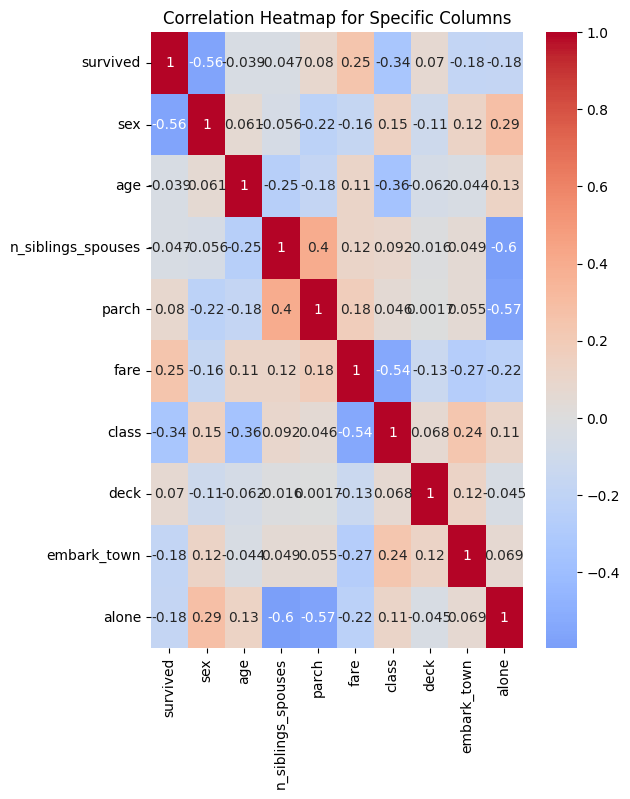

In [ ]:
# specific_columns =  list(df.columns)
# # specific_columns.append('fsr_tripFual')
# # Create a subset DataFrame with the specific columns
# subset_data = df[specific_columns]
# print(specific_columns)
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for the specific columns
corr_matrix = Data.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(6, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')
plt.show()


## الانحدار اللوجستي Logistic Regression

### تقسيم البيانات

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = Data.drop('survived', axis=1)
y = Data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### تدريب الداتا

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

train = LogisticRegression(max_iter=50, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### تقييم المودل

In [ ]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8035714285714286


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54 18]
 [ 4 36]]


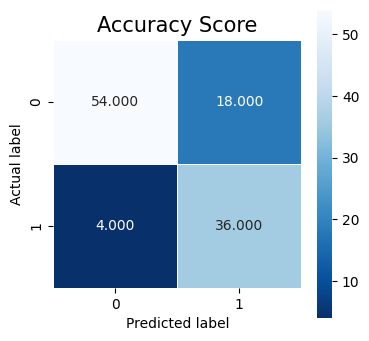

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

### تحسين المودل

In [ ]:
# Logistic Regression Classifier
train = LogisticRegression(max_iter=300, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1])

### تقييم المودل بعد التحسين

In [ ]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8125


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56 16]
 [ 5 35]]


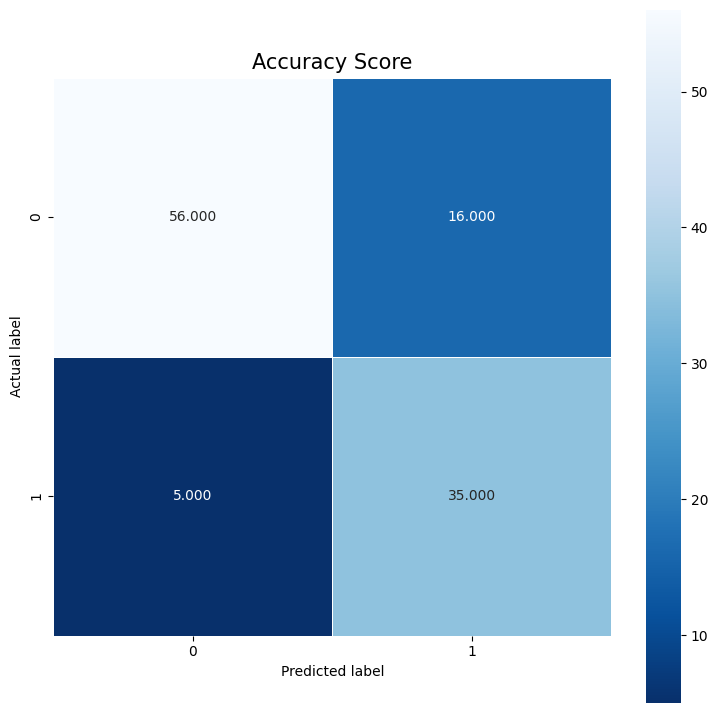

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

### حفظ المودل

In [ ]:
Data

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22,1,0,7.2500,2,2,2,0
1,1,0,38,1,0,71.2833,0,2,0,0
2,1,0,26,0,0,7.9250,2,2,2,1
3,1,0,35,1,0,53.1000,0,2,2,0
4,0,1,28,0,0,8.4583,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...
553,0,0,22,0,0,10.5167,2,2,2,1
554,0,1,28,0,0,10.5000,1,2,2,1
555,1,0,19,0,0,30.0000,0,1,2,1
556,0,0,28,1,2,23.4500,2,2,2,0


In [ ]:
import joblib
model_filename = '/content/drive/MyDrive/model_of _data.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as /content/drive/MyDrive/model_of _data.joblib



## خوارزمية أقرب الجيران (k-NN):

In [ ]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Clean_data.csv')
#X = dataset.iloc[:, [2, 3]].values
#y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = Data.drop('survived', axis=1)
y = Data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58 14]
 [ 5 35]]


In [ ]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8303571428571429


حفظ المودل

In [ ]:
import joblib
model_filename = '/content/drive/MyDrive/model_of _data2.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as /content/drive/MyDrive/model_of _data2.joblib


## تعريف آلة المتجه الداعم (SVM)

In [ ]:
# Kernel SVM

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Clean_data.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
print (classifier.score(X_test, y_test))

0.7767857142857143


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.7767857142857143


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[82  0  0  0  0]
 [11  3  2  0  0]
 [ 8  2  2  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]]


حفظ المودل

In [ ]:
import joblib
model_filename = '/content/drive/MyDrive/model_of _data3.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as /content/drive/MyDrive/model_of _data3.joblib


In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)
print (classifier.score(X_test, y_test))

0.7142857142857143


In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)
print (classifier.score(X_test, y_test))

0.7410714285714286


In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
print (classifier.score(X_test, y_test))

0.75



##غابة القرار (Random forest):

In [ ]:
# Random Forest Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Clean_data.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier

# classifier = DecisionTreeClassifier(random_state=42)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Example classifier
# clf = RandomForestClassifier()

# Cross-validation (assuming X and y are your data and labels)
scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation

average_accuracy = scores.mean()
print(average_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.7328989703989703


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.7428571428571429


In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[95  2  0  0  0  1]
 [16  5  1  0  0  0]
 [ 8  2  4  0  0  0]
 [ 2  0  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  2  0  0  0  0]]


In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Example classifier
# clf = RandomForestClassifier()

# Cross-validation (assuming X and y are your data and labels)
scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation

average_accuracy = scores.mean()
print(average_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.7436936936936938


حفظ المودل

In [ ]:
import joblib
model_filename = '/content/drive/MyDrive/model_of _data4.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as /content/drive/MyDrive/model_of _data4.joblib



##شجرة القرار (Decision Tree):

In [ ]:
 #Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Clean_data.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

In [ ]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.7428571428571429


حفظ المودل

In [ ]:
import joblib
model_filename = '/content/drive/MyDrive/model_of _data5.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as /content/drive/MyDrive/model_of _data5.joblib
